### Анализ сервиса аренды самокатов GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.\
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:\
без подписки - абонентская плата отсутствует;\
    -стоимость одной минуты поездки — 8 рублей;\
    -стоимость старта (начала поездки) — 50 рублей;\
с подпиской Ultra абонентская плата — 199 рублей в месяц;\
    -стоимость одной минуты поездки — 6 рублей;\
    -стоимость старта — бесплатно.

Описание данных\

Пользователи — users_go.csv

user_id — уникальный идентификатор пользователя\
name — имя пользователя\
age — возраст\
city — город\
subscription_type — тип подписки (free, ultra)


Поeздки — rides_go.csv

user_id — уникальный идентификатор пользователя\
distance — расстояние, которое пользователь проехал в текущей сессии (в метрах)\
duration — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»\
date — дата совершения поездки


Подписки — subscriptions_go.csv

subscription_type — тип подписки\
minute_price — стоимость одной минуты поездки по данной подписке\
start_ride_price — стоимость начала поездки\
subscription_fee — стоимость ежемесячного платежа\

#Данное исследвание будет разделено на несколько частей:

Часть 1 - Изучение общей информации;

Часть 2 - Предобработка данных;

Часть 3 - Исследовательский анализ;

Часть 4 - Объединение данных;

Часть 5 - Аггрегация и формирование гипотез;

Часть 6 - Проверка гипотез;

Часть 7 - Общий вывод.

### Шаг 1. Загрузка данных

#### Инициализация библиотек

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!{sys.executable} -m pip install plotly.express
import plotly.express as px
import numpy as np
from scipy import stats as st
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

#### Чтение данных

Запись задействованных csv-файлов в соответствующие датафреймы

In [2]:
pd.options.display.max_columns = 20

data_users = pd.read_csv('/datasets/users_go.csv')
data_riders = pd.read_csv('/datasets/rides_go.csv')
data_sub = pd.read_csv('/datasets/subscriptions_go.csv')

#### Датасет "пользователи"

##### Информация о датафреме

In [3]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


##### Пример данных

In [4]:
data_users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
data_users.tail()

,user_id,name,age,city,subscription_type
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra
1564,1045,Артемий,28,Ростов-на-Дону,free


#### **Рассмотрим предоставленные данные подробней**

##### user_id

In [6]:
len(data_users['user_id'].unique())

1534

In [7]:
duplicate_user_ids = data_users['user_id'].value_counts()
duplicate_user_ids = duplicate_user_ids[duplicate_user_ids > 1]
duplicate_user_id_list = duplicate_user_ids.index.tolist()
print(duplicate_user_id_list)

[209, 807, 611, 43, 737, 47, 1198, 829, 924, 153, 635, 72, 909, 908, 136, 1045, 1237, 127, 659, 307, 1245, 121, 666, 108, 297, 809, 293, 16, 422, 403, 204]


In [8]:
duplicate_users = data_users[data_users['user_id'].isin(duplicate_user_id_list)].sort_values('user_id')
duplicate_users

,user_id,name,age,city,subscription_type
15,16,Амалия,27,Краснодар,ultra
1535,16,Амалия,27,Краснодар,ultra
42,43,Стефания,22,Омск,ultra
1539,43,Стефания,22,Омск,ultra
1563,47,Юрий,28,Тюмень,ultra
...,...,...,...,...,...
1554,1198,Демид,29,Ростов-на-Дону,free
1558,1237,Евгения,23,Тюмень,free
1236,1237,Евгения,23,Тюмень,free
1544,1245,Регина,27,Пятигорск,free


Как мы можем заметить, предоставленные данные не лишены дублей

In [9]:
data_users.drop_duplicates(keep='first').reset_index(drop=True)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1529,1530,Ростислав,29,Сочи,free
1530,1531,Никита,25,Пятигорск,free
1531,1532,Алексей,26,Тюмень,free
1532,1533,Степан,22,Краснодар,free


##### Возраст

##### Столбец "Город"

In [10]:
count_users_by_city = data_users['city'].value_counts()
count_users_by_city

Пятигорск         226
Екатеринбург      206
Ростов-на-Дону    202
Краснодар         196
Сочи              192
Омск              186
Тюмень            185
Москва            172
Name: city, dtype: int64

##### Столбец "Тариф"

In [11]:
count_sub = data_users['subscription_type'].value_counts()
count_sub

free     846
ultra    719
Name: subscription_type, dtype: int64

#### Датасет "Поездки"

##### Общая информация

In [12]:
data_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


##### Пример данных

In [13]:
data_riders.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [14]:
data_riders.tail()

,user_id,distance,duration,date
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27
18067,1534,2371.711192,15.893917,2021-12-29


##### Наибольшее число поездок (user_id)

In [15]:
top_riders = data_riders['user_id'].value_counts().sort_values(ascending=False)
top_riders.head(10)

1236    27
1063    26
783     26
1204    24
1149    23
716     23
1531    23
1030    23
1252    22
919     22
Name: user_id, dtype: int64

##### Наибольшая дистанция

In [16]:
total_distance_by_user = data_riders.groupby(['user_id']).sum(numeric_only = True)
total_distance_by_user.head(10)

,distance,duration
user_id,,
1,34070.182066,204.604909
2,33964.058614,197.644279
3,36907.597866,233.193513
4,44837.189916,288.563581
5,35556.949649,174.073932
6,34078.606693,203.299077
7,48707.479147,258.371222
8,15754.261455,90.681387
9,23730.942270,129.790228


#### Датасет "Подписки"

##### Общая информация

In [17]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


##### Содержание информации

In [18]:
data_sub

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Как мы видим, данная таблица является справочником с показательными данными по подпискам

### Шаг 2. Предобработка данных

#### Датасет "Пользователи"

##### Пропуски

In [19]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

##### Удаление дублей

In [20]:
data_users.duplicated().sum()

31

In [21]:
data_users.drop_duplicates(inplace=True)

In [22]:
data_users.duplicated().sum()

0

#### Датасет "Поездки"

##### Пропуски

In [23]:
data_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

##### Типизация данных

In [24]:
data_riders['date'] = pd.to_datetime(data_riders['date'], format = '%Y-%m-%d')
data_riders['date'].head(10)

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
5   2021-10-09
6   2021-10-19
7   2021-11-06
8   2021-11-14
9   2021-11-22
Name: date, dtype: datetime64[ns]

Приведём дальность поездки к метрам

In [25]:
data_riders['distance'] = np.ceil(data_riders['distance'])
data_riders['distance'].head(10)

0    4410.0
1    2618.0
2     755.0
3    2695.0
4    4029.0
5    2771.0
6    3040.0
7    2843.0
8    3413.0
9     749.0
Name: distance, dtype: float64

Округлим время в секундах

In [26]:
data_riders['duration'] = np.ceil(data_riders['duration'])
data_riders['duration'].head(10)

0    26.0
1    16.0
2     7.0
3    19.0
4    27.0
5    17.0
6    15.0
7    24.0
8    16.0
9    16.0
Name: duration, dtype: float64

Переведём время поездки в формат времени для наглядности

In [27]:
data_riders['duration_time'] = pd.to_datetime(data_riders['duration'], unit='m').dt.strftime('%H:%M:%S')
data_riders['duration_time']

0        00:26:00
1        00:16:00
2        00:07:00
3        00:19:00
4        00:27:00
           ...   
18063    00:20:00
18064    00:22:00
18065    00:19:00
18066    00:17:00
18067    00:16:00
Name: duration_time, Length: 18068, dtype: object

На основе информации выше и отсутствия в будующем необходимости ссылаться на полную дату (в текущем случае), мы можем выделить месяцы в отдельный столбец для последующей работы

Сначала проверим, за какой период предоставлены данные. Если данные предоставлены за несколько лет, то они могут попасть в один и тот же месяц

In [28]:
data_riders['date'].dt.year.unique()

array([2021])

Исходя из того, что данные предоставлены за один год, мы можем сделать вышеописанное, не опасаясь ошибок

In [29]:
data_riders['month'] = data_riders['date'].dt.month
data_riders['month'].head(10)

0     1
1     1
2     4
3     8
4     8
5    10
6    10
7    11
8    11
9    11
Name: month, dtype: int64

In [30]:
sorted_unique_months = data_riders['month'].unique()
sorted_unique_months.sort()
sorted_unique_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Вывод:

-Пропущенных данных в таблицах нет;\
-Дубликаты имеются среди пользователей, удалили строки-дубликаты;\
-Добавили столбец month с номер месяца.

### Шаг 3. Исследовательский анализ данных

##### 3.1 частота встречаемости городов;

In [31]:
count_users_by_city = data_users['city'].value_counts()
count_users_by_city

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

In [32]:
count_users_by_city['rate'] = round(data_users['city'].value_counts() / 
                                    count_users_by_city.sum(), 2) * 100

count_users_by_city['rate']

Пятигорск         14.0
Екатеринбург      13.0
Ростов-на-Дону    13.0
Краснодар         13.0
Сочи              12.0
Омск              12.0
Тюмень            12.0
Москва            11.0
Name: city, dtype: float64

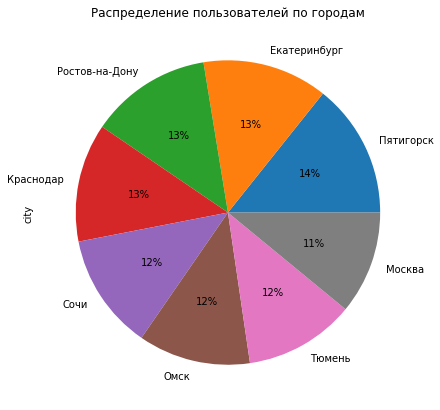

In [33]:
data_users['city'].value_counts().plot(
    kind = 'pie', 
    y = count_users_by_city,
    autopct = '%1.0f%%',
    figsize=(7,7), 
    title = 'Распределение пользователей по городам')

plt.show()

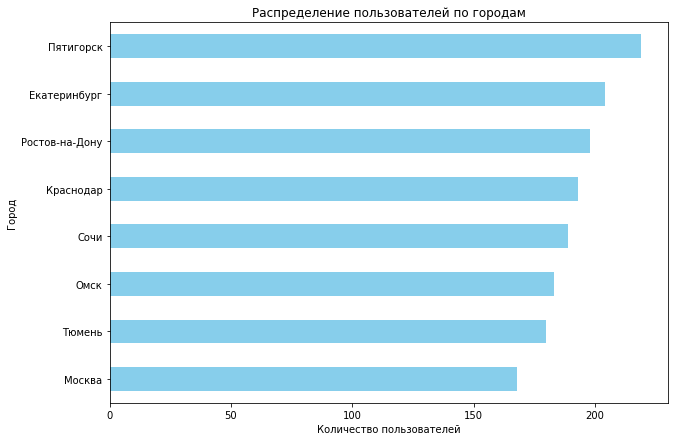

In [34]:
city_counts = data_users['city'].value_counts()
city_counts_sorted = city_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 7))
city_counts_sorted.plot(kind='barh', color='skyblue')
plt.title('Распределение пользователей по городам')
plt.xlabel('Количество пользователей')
plt.ylabel('Город')
plt.show()

*Вывод:* \
Распределение пользователей по городам +- одинаковое:\
-Наибольшее количество пользователей в Пятигорске;\
-Наименьшее в Москве.

#### 3.2 соотношение пользователей с подпиской и без подписки

In [35]:
count_sub = data_users['subscription_type'].value_counts()
count_sub

free     835
ultra    699
Name: subscription_type, dtype: int64

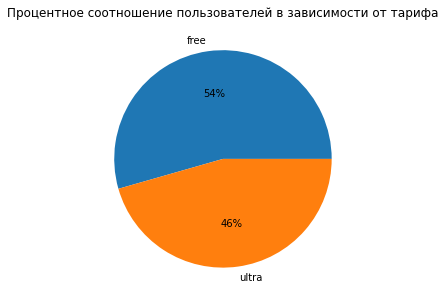

In [36]:
data_users['subscription_type'].value_counts().plot(
    kind='pie',
    autopct='%1.0f%%',
    figsize=(5, 5),
    title='Процентное соотношение пользователей в зависимости от тарифа'
)
plt.ylabel(None)
plt.show()

**Вывод:** преобладают пользователи с бесплатным тарифом (54%).

#### 3.3 возраст пользователей

##### Самые молодые

In [37]:
data_users['age'].sort_values().head(10)

664     12
66      12
727     12
34      12
235     13
1249    13
314     13
83      13
553     13
1241    13
Name: age, dtype: int64

##### Старшие пользователи

In [38]:
data_users['age'].sort_values(ascending=False).head(10)

1201    43
961     39
804     38
453     38
383     38
205     37
848     37
721     36
1491    36
644     36
Name: age, dtype: int64

In [39]:
round(data_users['age'].describe(),0)

count    1534.0
mean       25.0
std         5.0
min        12.0
25%        22.0
50%        25.0
75%        28.0
max        43.0
Name: age, dtype: float64

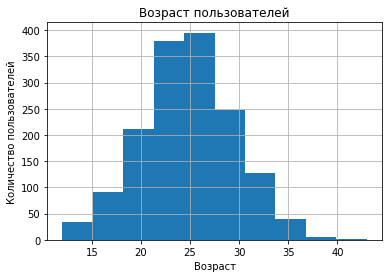

In [40]:
plt.hist(data_users['age'], bins = 10)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid()
plt.show()

#### 3.4 расстояние, которое пользователь преодолел за одну поездку

##### Самые короткиен поездки

In [41]:
data_riders['distance'].sort_values().head(10)

11555     1.0
9541      3.0
13690     5.0
8658      7.0
7841      8.0
8906     12.0
8324     13.0
13940    16.0
11862    16.0
15626    16.0
Name: distance, dtype: float64

##### Самые длительные поездки

In [42]:

data_riders['distance'].sort_values(ascending=False).head(10)

16309    7212.0
16484    7067.0
15580    6909.0
17171    6761.0
17242    6725.0
10341    6672.0
11385    6602.0
12086    6539.0
10915    6536.0
11319    6504.0
Name: distance, dtype: float64

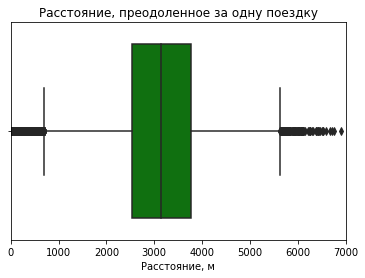

In [43]:
sns.boxplot(x=data_riders['distance'], color='green')
plt.title('Расстояние, преодоленное за одну поездку')
plt.xlabel('Расстояние, м')
_ = plt.xlim(0, 7000)

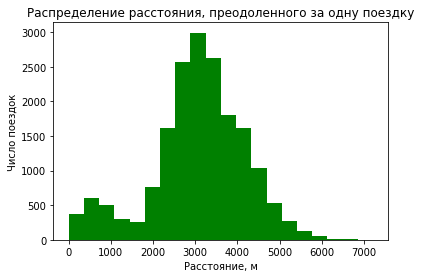

In [44]:
plt.hist(data_riders['distance'], bins=20, color='green')
plt.title('Распределение расстояния, преодоленного за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Число поездок')
plt.show()

Два пика можно объяснить использованием самокатов пользователями - для быстрого достижения определенной точки, используя самокат(2-4км) либо для того, чтобы "покататься" - тогда большой дирстанции не будет и скорее всего подобное будет происходить на площадах и в парках (до 1 км)

Как мы можем заметить: в таблице очень много выбросов - как поездки на пару метров(первый квартал), так и множество поездок свыше 6км (4 квартал)

#### 3.5 продолжительность поездок

##### Самые короткие

In [45]:
data_riders['duration'].sort_values().head(10)

6860     1.0
16704    1.0
10426    1.0
16336    1.0
6531     1.0
9282     1.0
15132    1.0
7437     1.0
9622     1.0
15771    1.0
Name: duration, dtype: float64

##### Самые длительные поездки

In [46]:
data_riders['duration'].sort_values(ascending=False).head(10)

4215    41.0
4709    40.0
2623    40.0
1998    39.0
6453    39.0
143     39.0
3729    38.0
499     37.0
5013    37.0
1894    37.0
Name: duration, dtype: float64

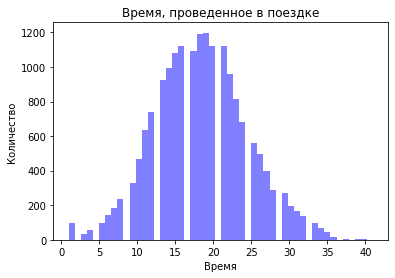

In [47]:
plt.hist(data_riders['duration'], bins=50, alpha=0.5, color='blue')
plt.title('Время, проведенное в поездке')
plt.xlabel('Время')
plt.ylabel('Количество')
plt.show()

In [48]:
anomalous_data = data_riders[data_riders['duration'] < 1].sort_values(['duration_time','distance', 'month'])
print(anomalous_data)

Empty DataFrame
Columns: [user_id, distance, duration, date, duration_time, month]
Index: []


Как мы видим - Поедки любой длинны имеют место быть, хотя чаще всего онги занимают 10-25 минут
Так же стоит передать разработчикам информацию о возможности проехать свыше 4км за 30 секунд - возможно это стандартная скорость для самокатов... или, что более вероятно - техническая ошибка/используемый пользователями эксплойт для экономии.

#### Премежуточный вывод
**Частота встречаемости городов**

Количество пользователей по городам распределено примерно одинаково, нет выдающихся значений. Лидером по количеству пользователей является Пятигорск - 219 пользователей.\ Меньше всего пользователей в Москве - 168. Связано это скорее всего с тем, что Пятигорск по размерам в несколько раз меньше Москвы, т.е. в Пятигорске удобнее брать самокат, чтобы куда-то добраться.\
Соотношение пользователей с подпиской и без подписки:\
Пользователей, использующих бесплатную подписку больше - 835 человек, что является ~54% от общего числа пользователей.\ На платной подписке сидит 699 пользователей, что соответственно является ~46%.
Возраст пользователей:\
-Самыми младшими являются пользователи 12, 13 лет.\
-Самыми старшими - 43, 39.\
В целом, пользователи приложения укладываются в промежуток от 20 до 30 лет.\
Расстояние, которое пользователь преодолел за одну поездку:\
-Самая короткая дистанция - 0.86 км\
-Самая длинная - 7.2 км\
В основном пользователи проезжают от 2.5 км до 4 км.\
Продолжительность поездок:\
-Самые короткие поездки - по пол минуты. Выглядят крайне странно, возможно пользователи просто передумали пользоваться самокатом. Либо же техническая неинсправность самого самоката.\
-Самая длинная поездка заняла 40 минут.\
В основном же длительность поездки состовляет 13 - 22 минут.

### Шаг 4. Объединение данных

#### 4.1 Объединение данных о пользователях, поездках и подписках в один датафрейм.

In [49]:
full_data = data_users.merge(data_riders, on ='user_id')
full_data = full_data.merge(data_sub, on='subscription_type')
full_data

,user_id,name,age,city,subscription_type,distance,duration,date,duration_time,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,00:26:00,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,00:16:00,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755.0,7.0,2021-04-20,00:07:00,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,00:19:00,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,27.0,2021-08-28,00:27:00,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3782.0,20.0,2021-11-04,00:20:00,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2841.0,22.0,2021-11-16,00:22:00,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3827.0,19.0,2021-11-18,00:19:00,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2903.0,17.0,2021-11-27,00:17:00,11,8,50,0


In [50]:
print("Количество строк в data_users:", len(data_users))
print("Количество строк в data_riders:", len(data_riders))
print("Количество строк в data_sub:", len(data_sub))
print("Количество строк в объединенном датафрейме full_data:", len(full_data))

Количество строк в data_users: 1534
Количество строк в data_riders: 18068
Количество строк в data_sub: 2
Количество строк в объединенном датафрейме full_data: 18068


Как мы можем заметить - количество строк итогового датафрейма совпадает с наибольшим количеством строк в датафреймах начальных, то есть мы ничего не добавили и не убрали.

#### 4.2 Создание датафреймов с данными о пользователях с подпиской и без

##### C подпиской

In [51]:
free_sub = full_data.query("`subscription_type` == 'free'")
free_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,duration_time,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2516.0,15.0,2021-01-02,00:15:00,1,8,50,0
6501,700,Айдар,22,Омск,free,847.0,17.0,2021-02-01,00:17:00,2,8,50,0
6502,700,Айдар,22,Омск,free,4005.0,21.0,2021-02-04,00:21:00,2,8,50,0
6503,700,Айдар,22,Омск,free,1206.0,10.0,2021-02-10,00:10:00,2,8,50,0
6504,700,Айдар,22,Омск,free,3048.0,18.0,2021-02-14,00:18:00,2,8,50,0


##### Без подписки

In [52]:
ultra_sub = full_data.query("`subscription_type` == 'ultra'")
ultra_sub.head()

,user_id,name,age,city,subscription_type,distance,duration,date,duration_time,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,00:26:00,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,00:16:00,1,6,0,199
2,1,Кира,22,Тюмень,ultra,755.0,7.0,2021-04-20,00:07:00,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,00:19:00,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,27.0,2021-08-28,00:27:00,8,6,0,199


#### 4.3 Визуализация 
<span style="color: #FF0000">В</span><span style="color: #FF7F00">из</span><span style="color: #FFFF00">уа</span><span style="color: #00FF00">ли</span><span style=": #0000FF">за</span><span style="color: #4B0082">ци</span><span style="color: #9400D3">я</span>

##### Бесплатный тариф

###### Расстояние

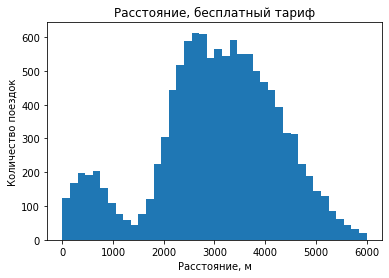

In [53]:
plt.hist(free_sub['distance'], bins=40, range = (0, 6000))
plt.title('Расстояние, бесплатный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

###### Время

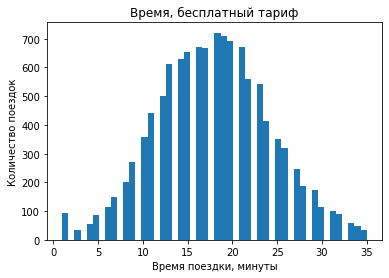

In [54]:
plt.hist(free_sub['duration'], bins=50, range = (1, 35))
plt.title('Время, бесплатный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.show()

#### Ультра тариф

###### Расстояние

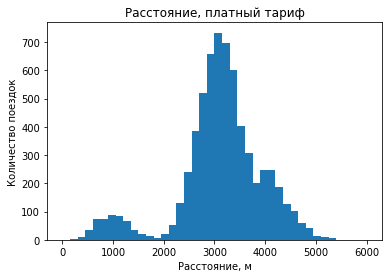

In [55]:
plt.hist(ultra_sub['distance'], bins=40, range = (0, 6000))
plt.title('Расстояние, платный тариф')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()

###### Время

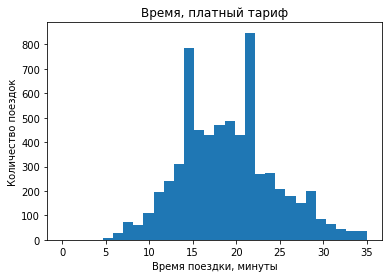

In [56]:
plt.hist(ultra_sub['duration'], bins=30, range = (0, 35))
plt.title('Время, платный тариф')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.show()

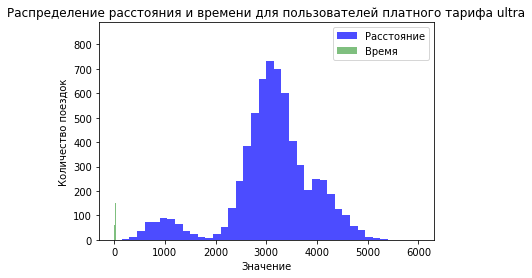

In [57]:
plt.hist(ultra_sub['distance'], bins=40, range=(0, 6000), color='blue', alpha=0.7, label='Расстояние')

plt.hist(ultra_sub['duration'], bins=30, range=(0, 35), color='green', alpha=0.5, label='Время', histtype='stepfilled')

plt.title('Распределение расстояния и времени для пользователей платного тарифа ultra')
plt.xlabel('Значение')
plt.ylabel('Количество поездок')
plt.legend()
plt.show()

##### Наложения по времени и расстоянию

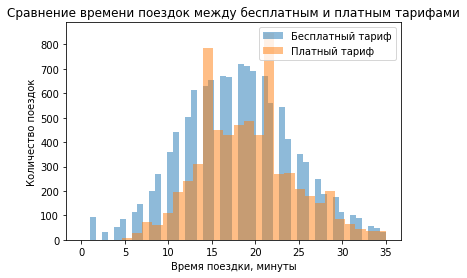

In [58]:
plt.hist(free_sub['duration'], bins=50, range=(1, 35), alpha=0.5, label='Бесплатный тариф')
plt.hist(ultra_sub['duration'], bins=30, range=(0, 35), alpha=0.5, label='Платный тариф')
plt.title('Сравнение времени поездок между бесплатным и платным тарифами')
plt.xlabel('Время поездки, минуты')
plt.ylabel('Количество поездок')
plt.legend(loc='upper right')
plt.show()

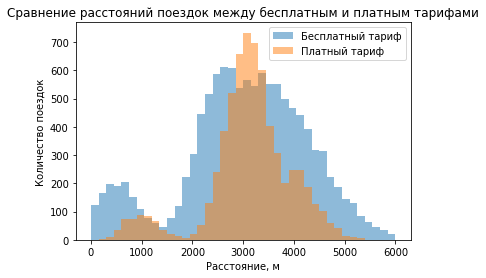

In [59]:
plt.hist(free_sub['distance'], bins=40, range=(0, 6000), alpha=0.5, label='Бесплатный тариф')
plt.hist(ultra_sub['distance'], bins=40, range=(0, 6000), alpha=0.5, label='Платный тариф')
plt.title('Сравнение расстояний поездок между бесплатным и платным тарифами')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.legend(loc='upper right')
plt.show()

##### Промежуточный вывод
Проделанная работа:\
-Объединили данные о пользователях, поездках и тарифах в один датафрейм - full_data.\
-Выделили два датафрейма на основе full_data:\
--free_sub - Информация о пользователях с бесплатным тарифом\
--ultra_sub - Информация о пользователях с платным тарифом\
-Визуализировали информацию о расстоянии и времени для каждого из тарифов.
Выводы:\
-Для бесплатного тарифа время поездки составляет от 10 до 30 минут, и проезжают от 2 до 5 км, есть пользователи, которые проехали даже 6, 6.5 км.\
-Платный тариф. В основном время укладывается в промежуток от 15 до 25 минут. Пик расстояния приходится на 3км.\
Таким образом, можно сделать вывод, что пользователи с бесплатным тарифом в целом совершают более долгие поездки, а также проезжают большее расстояние, чем пользователи на платном тарифе.

### Часть 5 - Аггрегация и формирование гипотез;

#### Датафрейм с аггрегированными данными

5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4:\
 найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [60]:
total_data = pd.pivot_table(full_data,
                           index=['month', 'user_id'],
                           values = ['distance', 'duration', 'name', 'subscription_type', 'duration_time',
                                    'minute_price', 'start_ride_price', 'subscription_fee'],
                           aggfunc = {'distance': sum, 
                                      'duration': sum,
                                      'duration_time' : min, 
                                      'name' : len, 
                                      'subscription_type' : min,
                                      'minute_price': min, 
                                      'start_ride_price': min, 
                                      'subscription_fee': min})


total_data.rename(columns = {'name' : 'count_tips'}, inplace = True)
total_data.sort_values(by=['month','count_tips','duration','distance']).head(10)

distance  duration duration_time  minute_price  count_tips  \
month user_id                                                               
1     1224       4431.0       1.0      00:01:00             8           1   
      922        4621.0       1.0      00:01:00             8           1   
      1460       5532.0       1.0      00:01:00             8           1   
      1150       5667.0       1.0      00:01:00             8           1   
      1498        550.0       4.0      00:04:00             8           1   
      1308        687.0       4.0      00:04:00             8           1   
      996         402.0       5.0      00:05:00             8           1   
      1243        542.0       5.0      00:05:00             8           1   
      787         402.0       6.0      00:06:00             8           1   
      378         598.0       6.0      00:06:00             6           1   

               start_ride_price  subscription_fee subscription_type  
month user_id                                                        
1     1224                   50                 0              free  
      922                    50                 0              free  
      1460                   50                 0              free  
      1150                   50                 0              free  
      1498                   50                 0              free  
      1308                   50                 0              free  
      996                    50                 0              free  
      1243                   50                 0              free  
      787                    50                 0              free  
      378                     0               199             ultra

#### 5.2 Добавление столбца с помесячной выручкой

5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.\
 Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.\
 Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до\
 следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [61]:
def calculate_revenue(row):
    if row['subscription_type'] is not None:
        return row['minute_price'] * row['duration'] + row['start_ride_price'] * row['count_tips']+ row['subscription_fee']
    else:
        return 'Not such sub'

total_data['monthly_revenue'] = total_data.apply(calculate_revenue, axis=1)
total_data.head(10)

distance  duration duration_time  minute_price  count_tips  \
month user_id                                                               
1     1          7028.0      42.0      00:16:00             6           2   
      3          3062.0      13.0      00:13:00             6           1   
      5          3915.0      13.0      00:13:00             6           1   
      7          6479.0      28.0      00:11:00             6           2   
      12         3578.0      33.0      00:33:00             6           1   
      13         6689.0      42.0      00:18:00             6           2   
      14         7701.0      35.0      00:15:00             6           2   
      15         4188.0      39.0      00:39:00             6           1   
      20         3517.0      29.0      00:29:00             6           1   
      22         3059.0      13.0      00:13:00             6           1   

               start_ride_price  subscription_fee subscription_type  \
month user_id                                                         
1     1                       0               199             ultra   
      3                       0               199             ultra   
      5                       0               199             ultra   
      7                       0               199             ultra   
      12                      0               199             ultra   
      13                      0               199             ultra   
      14                      0               199             ultra   
      15                      0               199             ultra   
      20                      0               199             ultra   
      22                      0               199             ultra   

               monthly_revenue  
month user_id                   
1     1                  451.0  
      3                  277.0  
      5                  277.0  
      7                  367.0  
      12                 397.0  
      13                 451.0  
      14                 409.0  
      15                 433.0  
      20                 373.0  
      22                 277.0

Вывод:
Создали новый датафрейм с агрегированными данными (total_data) на основе датафрейма с объединенными данными (full_data).\
Нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.\
Также добавили столбец с помесячной выручкой, которую принес каждый пользователь.

### Шаг 6. Проверка гипотез

6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки?\
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу.\
Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Проверим гипотезу: пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе.\
H_0: Время (duration) пользователей на подписке ultra = время (duration) пользователей на подписке free\
H_1: Время (duration) пользователей на подписке ultra > время (duration) пользователей на подписке free\
alpha = 0.05



In [62]:
ultra = ultra_sub['duration'] 
free = free_sub['duration']

results = st.ttest_ind(ultra, 
                       free,
                       alternative = 'greater')

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


In [63]:
mean_duration_ultra = ultra_sub['duration'].mean()
mean_duration_free = free_sub['duration'].mean()

print("Средняя продолжительность поездок для пользователей с тарифом 'ultra':", round(mean_duration_ultra,2))
print("Средняя продолжительность поездок для пользователей с бесплатным тарифом:", round(mean_duration_free,2))

Средняя продолжительность поездок для пользователей с тарифом 'ultra': 19.04
Средняя продолжительность поездок для пользователей с бесплатным тарифом: 17.89


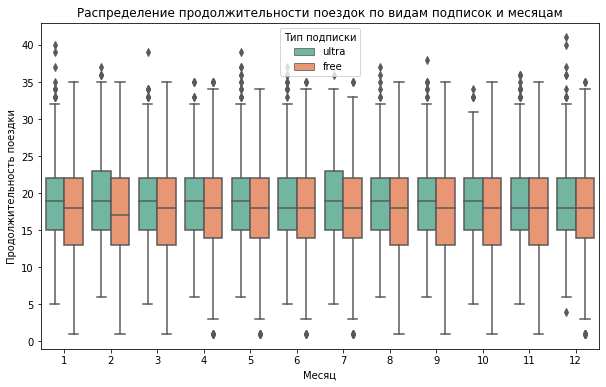

In [64]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='month', y='duration', hue='subscription_type', data=full_data, palette='Set2')

# Настройка ос и заголовка
plt.title('Распределение продолжительности поездок по видам подписок и месяцам')
plt.xlabel('Месяц')
plt.ylabel('Продолжительность поездки')

# Отображение легенды
plt.legend(title='Тип подписки')

plt.show()

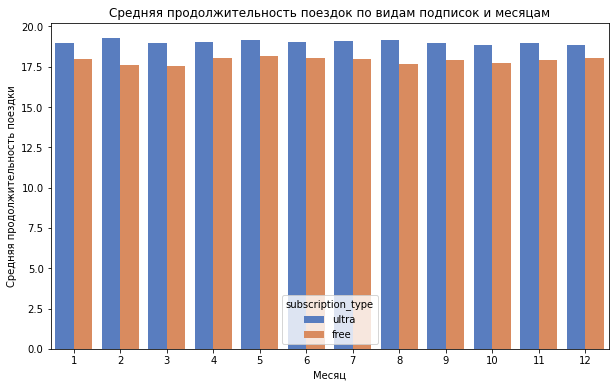

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='month', y='duration', hue='subscription_type', data=full_data, ci=None, palette='muted')

# Настройка осей и заголовка
plt.title('Средняя продолжительность поездок по видам подписок и месяцам')
plt.xlabel('Месяц')
plt.ylabel('Средняя продолжительность поездки')

plt.show()

**Вывод*: пользователи с подпиской тратят больше времени на поездки, но прибыль от поездок на разных тарифах равна, так как пользователи без подписки проезжают большее расстояние, что в конечном итоге подтверждает опровержение нулевой гипотезы.

Мы это выяснили, исходя из того, что гипотеза о том, что платные пользователи тратят время на поездки больше была отвергнута, следовательно они приносят кампании меньше прибыли и с учетом меньшей платы за время, кампания получает с них меньше прибыли, особенно если учитывать траты на обслуживание после их поездок (которая, как мцы видим, в среднем больше чем у бесплатных пользователей.)

6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката.\
 Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?\
 Проверьте гипотезу и сделайте выводы.

Для проверки данной гипотезы можно воспользоваться t-тестом для сравнения средних двух выборок.\
В данном случае, мы хотим проверить, что среднее расстояние, которое проезжают пользователи с подпиской ultra за одну поездку, не превышает 3130 метров.

H_0: Расстояние (distance) пользователей на подписке ultra = 3130 метров\
H_1: Расстояние (distance) пользователей на подписке ultra < 3130 метров\
alpha = 0.05

In [66]:
ultra_dist = ultra_sub[ultra_sub['subscription_type'] == 'ultra']['distance']

t_stat, p_value = st.ttest_1samp(ultra_dist, 3130, alternative='greater')

alpha = 0.05

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Существуют статистически значимые доказательства того, что среднее расстояние, которое проезжают пользователи с подпиской ultra, превышает 3130 метров.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимых доказательств в пользу того, что среднее расстояние, которое проезжают пользователи с подпиской ultra, превышает 3130 метров.")

Не отвергаем нулевую гипотезу. Нет статистически значимых доказательств в пользу того, что среднее расстояние, которое проезжают пользователи с подпиской ultra, превышает 3130 метров.


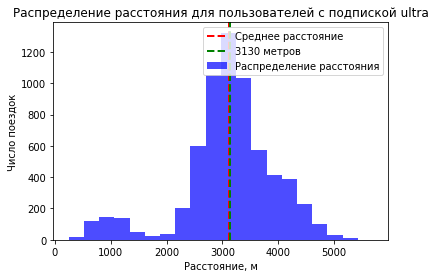

In [67]:
plt.hist(ultra_dist, bins=20, color='blue', alpha=0.7, label='Распределение расстояния')

plt.axvline(x=ultra_dist.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее расстояние')

plt.axvline(x=3130, color='green', linestyle='dashed', linewidth=2, label='3130 метров')

plt.xlabel('Расстояние, м')
plt.ylabel('Число поездок')
plt.title('Распределение расстояния для пользователей с подпиской ultra')
plt.legend()
plt.show()

**Вывод**: гипотеза проверена и опровергнута, следовательно, на основе статистически значимых доказательств того, что среднее расстояние, которое проезжают пользователи с подпиской ultra, не превышает 3130 метров (и по графику видно, что среднее расстояние приблизительно равно 3130м), мы не можем утверждать, что расстояние, которое проехали пользователи на тарифе ultra не превышает 3130 метров. 

6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

H_0: Выручка (revenue_per_month) пользователей на подписке ultra = выручка (revenue_per_month) пользователей на подписке free\
H_1: Выручка (revenue_per_month) пользователей на подписке ultra > выручка (revenue_per_month) пользователей на подписке free\
alpha = 0.05

In [68]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return row['minute_price'] * row['duration'] + row['start_ride_price']+ row['subscription_fee']
    elif row['subscription_type'] == 'free':
        return row['minute_price'] * row['duration'] + row['start_ride_price']+ row['subscription_fee']
    else:
        return 'Not such sub'

full_data['monthly_revenue'] = full_data.apply(revenue, axis=1)
full_data.head(10)

,user_id,name,age,city,subscription_type,distance,duration,date,duration_time,month,minute_price,start_ride_price,subscription_fee,monthly_revenue
0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,00:26:00,1,6,0,199,355.0
1,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,00:16:00,1,6,0,199,295.0
2,1,Кира,22,Тюмень,ultra,755.0,7.0,2021-04-20,00:07:00,4,6,0,199,241.0
3,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,00:19:00,8,6,0,199,313.0
4,1,Кира,22,Тюмень,ultra,4029.0,27.0,2021-08-28,00:27:00,8,6,0,199,361.0
5,1,Кира,22,Тюмень,ultra,2771.0,17.0,2021-10-09,00:17:00,10,6,0,199,301.0
6,1,Кира,22,Тюмень,ultra,3040.0,15.0,2021-10-19,00:15:00,10,6,0,199,289.0
7,1,Кира,22,Тюмень,ultra,2843.0,24.0,2021-11-06,00:24:00,11,6,0,199,343.0
8,1,Кира,22,Тюмень,ultra,3413.0,16.0,2021-11-14,00:16:00,11,6,0,199,295.0
9,1,Кира,22,Тюмень,ultra,749.0,16.0,2021-11-22,00:16:00,11,6,0,199,295.0


In [69]:
ultra_per_mnth = total_data.loc[total_data['subscription_type'] == 'ultra', 'monthly_revenue'] 
free_per_mnth = total_data.loc[total_data['subscription_type'] == 'free', 'monthly_revenue'] 

ultra_per_mnth_all = full_data.loc[full_data['subscription_type'] == 'ultra', 'monthly_revenue'] 
free_per_mnth_all = full_data.loc[full_data['subscription_type'] == 'free', 'monthly_revenue'] 

ultra_mean_revenue = ultra_per_mnth_all.mean()
free_mean_revenue = free_per_mnth_all.mean()

results = st.ttest_ind(ultra_per_mnth, 
                       free_per_mnth,
                       alternative='greater')

alpha = 0.05

print(results.pvalue)

print("Средняя выручка для пользователей с тарифом 'ultra':", ultra_mean_revenue)
print("Средняя выручка для пользователей с бесплатным тарифом:", free_mean_revenue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Средняя выручка для пользователей с тарифом 'ultra': 313.22615384615386
Средняя выручка для пользователей с бесплатным тарифом: 193.12793914246197
Отвергаем нулевую гипотезу


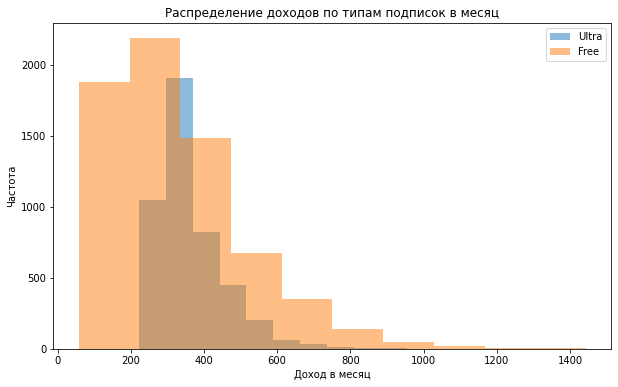

In [70]:
plt.figure(figsize=(10, 6))
plt.hist(ultra_per_mnth, bins=10, alpha=0.5, label='Ultra')
plt.hist(free_per_mnth, bins=10, alpha=0.5, label='Free')

# Настройка осей и заголовка
plt.title('Распределение доходов по типам подписок в месяц')
plt.xlabel('Доход в месяц')
plt.ylabel('Частота')
plt.legend()
plt.show()

**Вывод**: на основе проверки гипотезы, мы можем утверждать, что выручка с пользователей на подписке ultra превышает выручку с пользователей на подписке free

6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение.\
Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось.\
Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.\
Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ:**

Для проверки гипотезы о значимом снижении количества обращений в техподдержку до и после обновления серверов мобильного приложения, можно воспользоваться парным t-тестом для связанных выборок.\
Этот тест подходит для сравнения средних значений в двух связанных группах, т.е. для проверки различий в одной и той же группе до и после воздействия (в данном случае, до и после обновления серверов).\
Другими словами, парный t-тест позволит оценить, есть ли статистически значимое различие между средними количествами обращений до и после обновления.
Будем использовать гипотезу о равенстве средних для зависимых (парных) выборок.\
Гипотезы будут сформулированы так:\
H0 : μ1 = μ2\
H1 : μ1 > μ2\
где μ1 и μ2 - средние значения количество обращений в техподдержку до и после изменения.\
Метод, который нужно использовать при сравнении: scipy.stats.ttest_rel()

Пример:

In [71]:
t_statistic, p_value = st.ttest_ind(ultra_per_mnth, free_per_mnth, equal_var=False)

# Вывод результатов
print("Значение t-статистики:", t_statistic)
print("p-значение:", p_value)

Значение t-статистики: 13.201754888325674
p-значение: 1.774828178795375e-39


### Шаг 7. Общий вывод

В ходе работы были загружены три датафрейма:с пользователями, информацией о поездках и информацией о подписках.\
В процессе их предобработки была проведена проверка на пропуски (которых обнаружено не было), на дубли (только в data_users, обработано) и проведена работа над типизацией данных.\
В ходе анализа предоставленных данных были выявлены сходные параметры по количеству проживающих в разных городах юзеров (Больше всего в Пятигорске - 219, наименьшее число в Москве - 168).\
Анализ подписок продемонстрировал аналогичную картину сходства - на 54% пользователей платной подписке (835 человек) в предоставленных таблицах пришлось 46% бесплатных подписок (699 человек).
Средние возрастные рамки пользователей - в районе от 20 до 40  лет, а среднее расстояние использования - от 2,5 до 4 км за поездку, занимающую в среднем 10-25 минут.

Последующий анализ включал в себя объединение данных всех трёх датафреймов с последующим делениям на данные о пользователях бесплатной и платной подписок, для которых впоследствии была написана визуализация полученных результатов.\
На осонове этой информации было уточнено следующее: для бесплатного тарифа время поездки составляет от 10 до 30 минут, и время поезки  от 2 до 5 км, но есть пользователи, которые проехали свыше 6км, а пользователи платного тарифа в основном тратят время на поездки в промежутке от 15 до 25 минут и их пик расстояния приходится на 3км.\
И в конечном итоге мы нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц посредством сбора информации в отдельном датафрейме total_data, на основе данных которого был создан и продемонстрирован столбец с помесячной выручкой revenue_per_month.

По итогдам проделанной работы можно сделать следующие выводы:\
-Пользователи с подпиской тратят больше времени на поездки, чем пользователи на бесплатном тарифе;\
-Пользователи с подпиской в большинстве проезжают расстояние, превышающее 3130 метров за одну поездку;\
-Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.\
Таким образом мы можем утверждать, что пользователи с подпиской более выгодны для компании (время поездок влияет непосредственно на прибыль), но использование самокатов на большие расстояния требуют более частого технического обслуживания,
что на прибыли негативно сказывается. С другой стороны среди пользователей бесплатной подписки подобное расстояние не является редкостью, а дальность и время, затраченный на поездки не компенсируют стабильность получения средств с ежемесячной подписки.

В качестве рекомендаций можно указать следующее: тех специалистам проверить поездки на километры за 30 секунд на предмет эксплойтов программы, а непосредственно кампании незначительно увеличить стоимость минуты использования после достижения пользователем 3-4 километра дистанции для компенсации повышенных требований к обслуживанию.